# RAG-Mental Health- Q&A Bot 

The RAG Pipeline project is an implementation of a chatbot system that leverages the powerful combination of retrieval-based and generative models. The pipeline consists of two main stages: retrieval and generation. In the retrieval stage, the system extracts relevant information from the web using a Google search API to gather passages related to the user's query on mental health. The retrieved passages are then processed to filter out unwanted details, ensuring the relevance and quality of the information.

In the second stage, a GPT-2 (Generative Pre-trained Transformer 2) model is employed for text generation. The system formulates a prompt using the user's question and the retrieved passages, creating a context-rich input for the generative model. The GPT-2 model generates a response, providing insightful and context-aware answers to the user's queries on mental health.

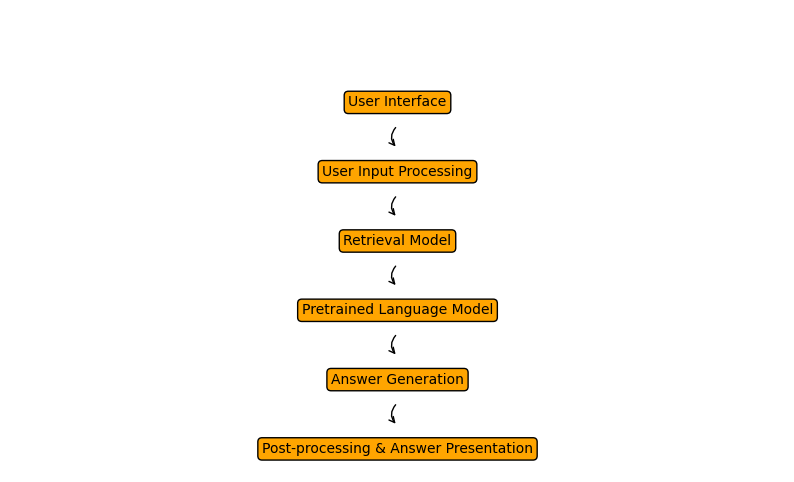

In [4]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Draw rectangles for each component with bluish color
components = [
    "User Interface",
    "User Input Processing",
    "Retrieval Model",
    "Pretrained Language Model",
    "Answer Generation",
    "Post-processing & Answer Presentation"
]

for i, component in enumerate(components):
    ax.text(0.5, 0.8 - i * 0.15, component, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='orange'))

# Draw arrows between components with bluish color
for i in range(len(components) - 1):
    ax.annotate('', xy=(0.5, 0.7 - i * 0.15), xytext=(0.5, 0.75 - i * 0.15),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='k'))


# Remove axes and display the diagram
ax.axis('off')
plt.show()


## Explanation of Components:
These components collectively form a comprehensive system for handling user queries, retrieving relevant information, and generating context-aware responses. The effectiveness of each component contributes to the overall performance and user satisfaction of the chatbot system.

#### User Interface:
The user interface serves as the primary entry point where users interact with the system. It allows users to input queries or questions and receive responses. The design of this component is crucial for providing a seamless and user-friendly experience.

#### User Input Processing:
Upon receiving user inputs, the system initiates user input processing. This step involves various tasks such as preprocessing and tokenization. Preprocessing may include tasks like removing unnecessary characters, correcting spelling errors, and converting text to lowercase. Tokenization breaks down the user input into individual units (tokens), making it ready for subsequent processing.

#### Retrieval Model:
The retrieval model plays a key role in fetching relevant information based on the user's query. It leverages a retrieval mechanism such as Elasticsearch or Solr to search through a collection of documents or passages. The goal is to identify and extract content that is contextually related to the user's input.
#### Pretrained Language Model:
The pretrained language model is a sophisticated language processing model that has been trained on vast amounts of textual data. Models like GPT-3, T5, and BERT excel in understanding the nuances of natural language. This component is responsible for comprehending the user's query and generating coherent responses.
#### Answer Generation:
In the answer generation phase, the system combines the information retrieved from documents with the context-aware generation capabilities of the pretrained language model. This synthesis ensures that the generated answers are not only relevant but also contextually appropriate. The answer generation component is pivotal in formulating responses that are both informative and natural-sounding.
#### Post-processing & Answer Presentation:
The final steps involve post-processing the generated answer to refine its quality. This may include additional steps like removing redundant information, formatting the text for readability, and ensuring grammatical correctness. Once the post-processing is complete, the refined answer is presented back to the user through the user interface, concluding the interaction cycle.

## Stage-1

In [5]:
import requests
from bs4 import BeautifulSoup
from googlesearch import search

This code fetches the top 5 Google search results related to mental health using requests and googlesearch. It extracts relevant information from the HTML content of each page with BeautifulSoup. This extracted content forms the basis for generating informative responses in the chatbot pipeline.

In [6]:
def retrieve_passages_from_web(question):
    # Perform a Google search and get the top 5 results
    search_results = list(search(f"mental health {question}", num_results=5))

    # Extract relevant passages from the search results
    urls = []
    for result in search_results:
        urls.append(result)

    return urls


The 'retrieve_passages_from_web' function conducts a Google search using the provided 'question' related to mental health. It utilizes the googlesearch library to fetch the top 5 search results. These results, represented as URLs, are then extracted and stored in a list named 'urls.' The function returns this list, providing a collection of web page links containing information deemed relevant to the mental health query. The function serves as the initial step in the retrieval process, forming the basis for obtaining passages that will later be processed and utilized in generating informative responses.

In [ ]:
def fetch_content(url, max_length=500):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract text from paragraphs
        paragraphs = soup.find_all('p')

        # Combine paragraphs into content
        content = ' '.join([paragraph.get_text() for paragraph in paragraphs])

        # Remove unwanted details (you may need to customize this part based on your needs)
        unwanted_phrases = ['Official website', 'Call or Text', 'Your browser is not supported']
        content = ' '.join([line for line in content.split('\n') if not any(phrase in line for phrase in unwanted_phrases)])

        # Limit the length of the content
        if len(content) > max_length:
            content = content[:max_length] + '...'

        return content.strip()
    except Exception as e:
        print(f"Error fetching content from {url}: {e}")
        return None


The fetch_content function retrieves content from a given URL by sending an HTTP request using the requests library. It then uses BeautifulSoup to parse the HTML and extracts text from paragraphs. The function combines these paragraphs into a unified content string. To enhance readability, unwanted details, identified by specific phrases, are removed. Additionally, the content length is limited to a specified maximum, ensuring concise information retrieval. In case of any errors during the process, the function prints an error message and returns None. This function plays a crucial role in obtaining and refining web page content for further processing in the chatbot pipeline.

## Stage-2

The chatbot pipeline progresses to the generation stage after retrieving passages from the web. The URLs obtained from the search results are used to fetch content from each web page using the fetch_content function. The content is then combined into a single string, creating context for the subsequent generative model.

The GPT-2 model is employed for response generation. The passages, user's question, and generated context are tokenized to form a prompt. The pre-trained GPT-2 model and tokenizer from the Hugging Face Transformers library are utilized for text generation. The generated response undergoes post-processing, removing special tokens, and is finally displayed to the user.

This example demonstrates the seamless integration of retrieval-based and generative models in the chatbot, offering context-aware responses to user queries on mental health.

In [9]:
# Example: Fetch passages for the search results
user_question = str(input("write your question: "))
search_result_urls = retrieve_passages_from_web(user_question)

# Fetch content from each URL
passages = [fetch_content(url) for url in search_result_urls]

from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Fetch content from each URL
passages = [fetch_content(url) for url in search_result_urls]

# Combine passages into a single string for context
context = ' '.join(passages)

# Formulate prompt for GPT-2
prompt = f"Prompt: {user_question}\nContext: {context}\nResponse:"

# Load pre-trained GPT-2 model and tokenizer
model_name = 'gpt2'  # You can use other GPT-2 variants like 'gpt2-medium', 'gpt2-large', etc.
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Tokenize the prompt
input_ids = tokenizer.encode(prompt, return_tensors='pt')

# Truncate input_ids if it exceeds max_length
max_length = 150  # Choose an appropriate value
if input_ids.size(1) > max_length:
    input_ids = input_ids[:, :max_length]

# Generate response using GPT-2
output = model.generate(
    input_ids,
    max_length=max_length,
    num_beams=5,
    no_repeat_ngram_size=2,
    top_k=50,
    top_p=0.95,
    temperature=0.7,
    max_new_tokens=500,  # Adjust as needed
)

# Decode the generated response
generated_response = tokenizer.decode(output[0], skip_special_tokens=True)

# Display the generated response
print("Generated Response:")
print(generated_response)

write your question: what is depression?


C:\Users\91701\AppData\Roaming\Python\Python39\site-packages\transformers\generation\configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
C:\Users\91701\AppData\Roaming\Python\Python39\site-packages\transformers\generation\configuration_utils.py:415: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=500) and `max_length`(=150) seem to have been set. `max_new_tokens` will take 

Generated Response:
Prompt: what is depression?
Context: Depressive disorder (also known as depression) is a common mental disorder. It involves a depressed mood or loss of pleasure or interest in activities for long periods of time. Depression is different from regular mood changes and feelings about everyday life. It can affect all aspects of life, including relationships with family, friends and community. It can result from or lead to problems at school and at work. Depression can happen to anyone. People who have lived through abuse, severe losse...  Learn more about depression from Craig Sawchuk, Ph.D., L.P., clinical psychologist at Mayo Clinic. Hi, I'm Dr. Craig Sawchuk, a clinical psychologist at Mayo Clinic. And I'd like to share with you some of the things I've learned from my experience with depression. First of all, depression is not just a mental illness, it's a physical one. You have to deal with it in a way that makes sense to you. If you don't know what you're dealing 